In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data = pd.read_excel('EastWestAirlines.xlsx', sheet_name='data')
data.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [39]:
data.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


# Data Preprocessing

In [4]:
# Check for missing values
print(data.isnull().sum())

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64


In [7]:
# Handling missing values (if any)
data = data.dropna()  # Dropping rows with missing values for simplicity

In [8]:
# Detecting outliers using Z-score
from scipy import stats

In [9]:
z_scores = np.abs(stats.zscore(data_df.select_dtypes(include=[np.number])))
data_df = data_df[(z_scores < 3).all(axis=1)]

In [10]:
# Feature Scaling
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data_df.select_dtypes(include=[np.number]))

In [12]:
# Update the DataFrame with scaled features
data_df_scaled = pd.DataFrame(scaled_features, columns=data_df.select_dtypes(include=[np.number]).columns)

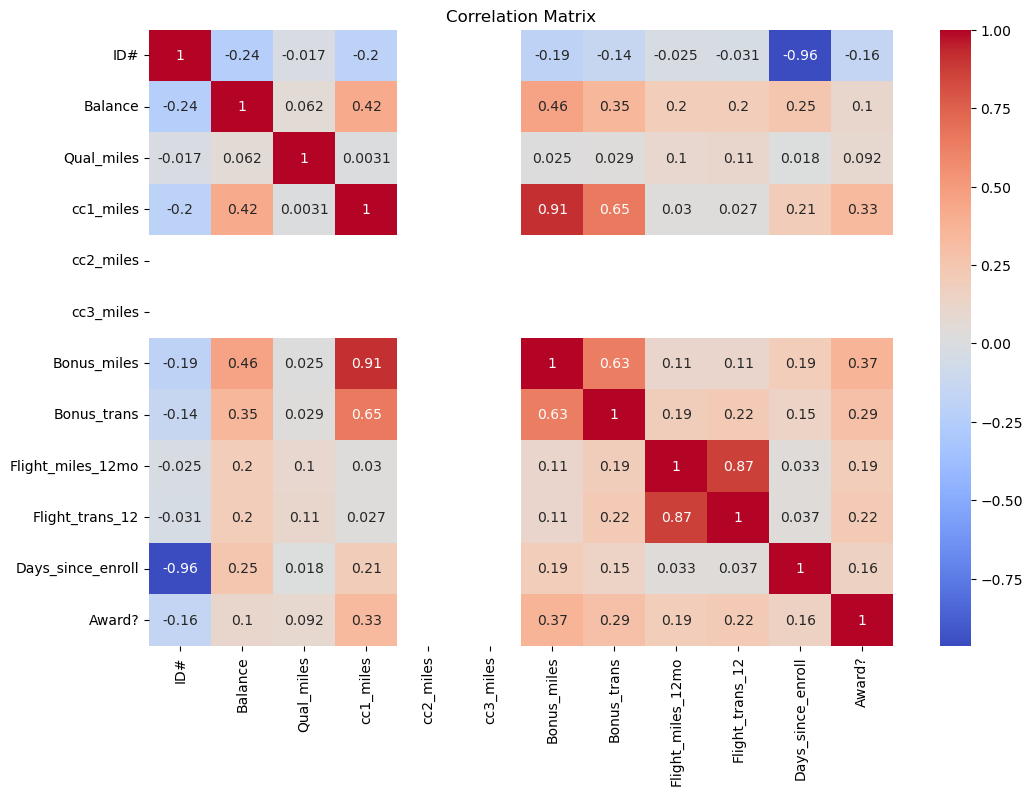

In [13]:
# Plotting correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(data_df_scaled.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


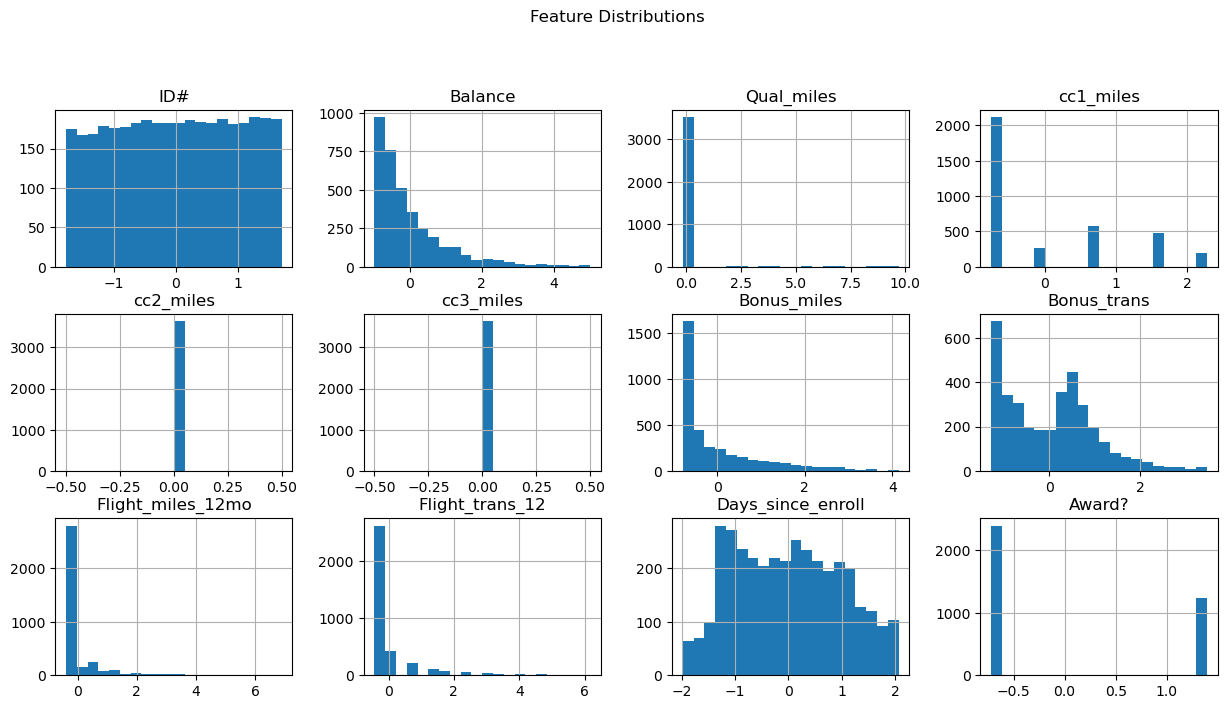

In [14]:
# Visualizing feature distributions
data_df_scaled.hist(bins=20, figsize=(15, 10), layout=(4, 4))
plt.suptitle('Feature Distributions')
plt.show()

# Implementing Clustering Algorithms:

In [15]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [17]:
# K-Means Clustering
inertia = []
silhouette_scores = []

for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_df_scaled)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(data_df_scaled, kmeans.labels_))

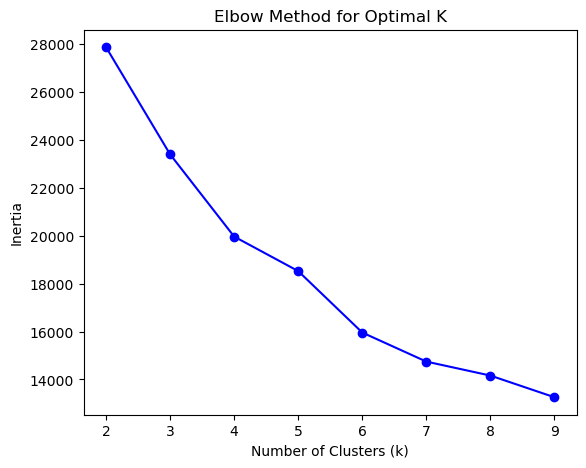

In [18]:
# Plot Elbow Method and Silhouette Score
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(range(2, 10), inertia, 'bo-', label='Inertia')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

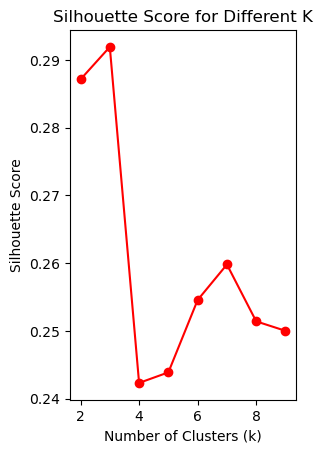

In [19]:
plt.subplot(1, 2, 2)
plt.plot(range(2, 10), silhouette_scores, 'ro-', label='Silhouette Score')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different K')
plt.show()

In [20]:
# Best K-Means clustering based on Silhouette Score
best_k = silhouette_scores.index(max(silhouette_scores)) + 2
kmeans = KMeans(n_clusters=best_k, random_state=42)
kmeans.fit(data_df_scaled)
kmeans_labels = kmeans.labels_

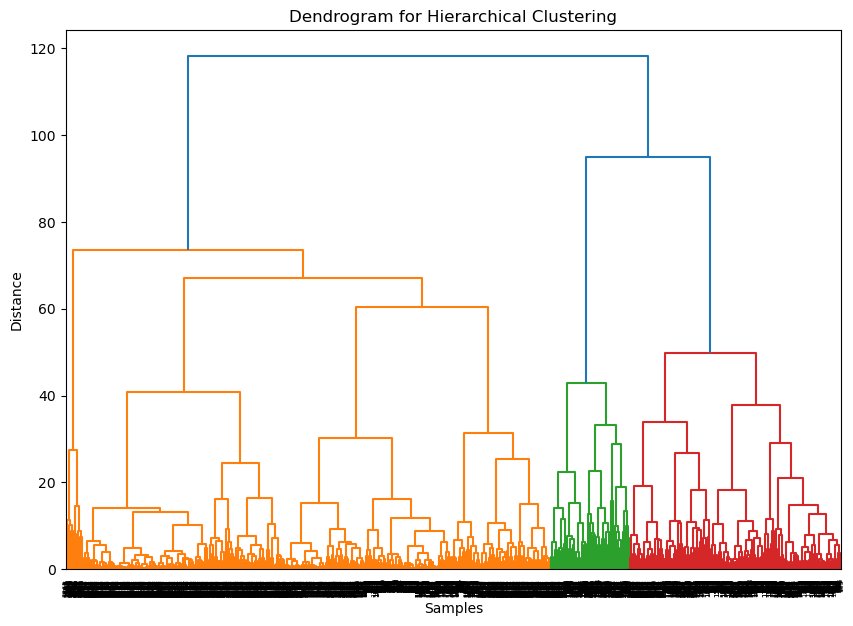

In [22]:
# Hierarchical Clustering
Z = linkage(data_df_scaled, method='ward')
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

# Cluster Analysis

In [23]:
# Assign clusters
hierarchical_labels = fcluster(Z, t=best_k, criterion='maxclust')

In [24]:
# DBSCAN Clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(data_df_scaled)

In [26]:
# Evaluate DBSCAN with silhouette score
dbscan_silhouette = silhouette_score(data_df_scaled, dbscan_labels)
print(f'DBSCAN Silhouette Score: {dbscan_silhouette:.4f}')

DBSCAN Silhouette Score: -0.3995


# Visualization

In [27]:
# Add cluster labels to the dataset
data_df_scaled['KMeans_Cluster'] = kmeans_labels
data_df_scaled['Hierarchical_Cluster'] = hierarchical_labels
data_df_scaled['DBSCAN_Cluster'] = dbscan_labels

In [29]:
# Analyzing clusters
print("K-Means Cluster Analysis")
print(data_df_scaled.groupby('KMeans_Cluster').mean())

K-Means Cluster Analysis
                     ID#   Balance  Qual_miles  cc1_miles  cc2_miles  \
KMeans_Cluster                                                         
0               0.249621 -0.387516   -0.049571  -0.614535        0.0   
1              -0.100947  0.592335    0.481406   0.014163        0.0   
2              -0.441953  0.593668   -0.010122   1.137754        0.0   

                cc3_miles  Bonus_miles  Bonus_trans  Flight_miles_12mo  \
KMeans_Cluster                                                           
0                     0.0    -0.569651    -0.520842          -0.250750   
1                     0.0     0.263982     0.661813           3.032057   
2                     0.0     1.001431     0.826419          -0.177852   

                Flight_trans_12  Days_since_enroll    Award?  \
KMeans_Cluster                                                 
0                     -0.242700          -0.259350 -0.322102   
1                      2.973064           0.127168 

In [31]:
print("\nHierarchical Cluster Analysis")
print(data_df_scaled.groupby('Hierarchical_Cluster').mean())


Hierarchical Cluster Analysis
                           ID#   Balance  Qual_miles  cc1_miles  cc2_miles  \
Hierarchical_Cluster                                                         
1                     0.261997 -0.336749    0.041959  -0.496521        0.0   
2                    -0.026213  0.294432    0.128192  -0.155182        0.0   
3                    -0.593244  0.664499   -0.144771   1.201285        0.0   

                      cc3_miles  Bonus_miles  Bonus_trans  Flight_miles_12mo  \
Hierarchical_Cluster                                                           
1                           0.0    -0.482617    -0.412047          -0.309911   
2                           0.0     0.016195     0.353755           2.349534   
3                           0.0     1.104861     0.815530          -0.169767   

                      Flight_trans_12  Days_since_enroll    Award?  \
Hierarchical_Cluster                                                 
1                           -0.314137

In [32]:
print("\nDBSCAN Cluster Analysis")
print(data_df_scaled.groupby('DBSCAN_Cluster').mean())


DBSCAN Cluster Analysis
                     ID#   Balance  Qual_miles  cc1_miles  cc2_miles  \
DBSCAN_Cluster                                                         
-1             -0.148947  0.453938    0.146908   0.388999        0.0   
 0              0.287999 -0.611324   -0.158869  -0.755664        0.0   
 1             -1.574482  0.736971   -0.158869  -0.755664        0.0   
 2             -0.219212 -0.571228   -0.158869  -0.755664        0.0   
 3             -1.496608 -0.776332   -0.158869   0.002087        0.0   
 4             -1.513330  0.435742   -0.158869   0.759839        0.0   
 5             -0.213342 -0.598777   -0.158869   0.759839        0.0   
 6              0.004412  0.196533   -0.158869   0.759839        0.0   
 7             -0.846779 -0.363397   -0.158869   0.002087        0.0   
 8             -1.036395  0.240128   -0.158869   1.517591        0.0   
 9             -0.906359  0.600927   -0.158869   0.002087        0.0   
 10            -0.975914 -0.482953   -0

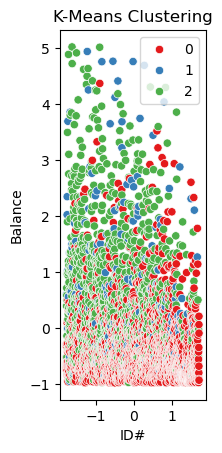

In [33]:
# K-Means Clusters
plt.subplot(1, 3, 1)
sns.scatterplot(x=data_df_scaled.iloc[:, 0], y=data_df_scaled.iloc[:, 1], hue=kmeans_labels, palette='Set1')
plt.title('K-Means Clustering')
plt.show()

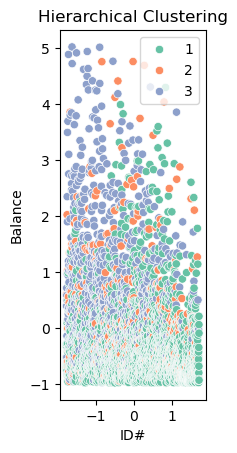

In [34]:
# Hierarchical Clusters
plt.subplot(1, 3, 2)
sns.scatterplot(x=data_df_scaled.iloc[:, 0], y=data_df_scaled.iloc[:, 1], hue=hierarchical_labels, palette='Set2')
plt.title('Hierarchical Clustering')
plt.show()

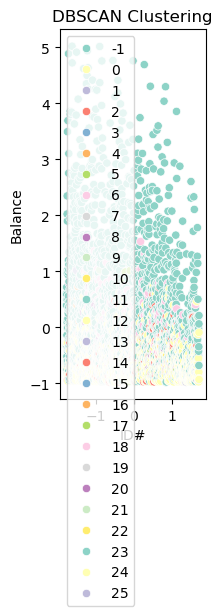

In [36]:
# DBSCAN Clusters
plt.subplot(1, 3, 3)
sns.scatterplot(x=data_df_scaled.iloc[:, 0], y=data_df_scaled.iloc[:, 1], hue=dbscan_labels, palette='Set3')
plt.title('DBSCAN Clustering')
plt.show()

# Evaluation

In [37]:
# Evaluate K-Means Clustering
kmeans_silhouette = silhouette_score(data_df_scaled.iloc[:, :-3], kmeans_labels)
print(f'K-Means Silhouette Score: {kmeans_silhouette:.4f}')

K-Means Silhouette Score: 0.2919


In [38]:
# Evaluate Hierarchical Clustering
hierarchical_silhouette = silhouette_score(data_df_scaled.iloc[:, :-3], hierarchical_labels)
print(f'Hierarchical Clustering Silhouette Score: {hierarchical_silhouette:.4f}')

Hierarchical Clustering Silhouette Score: 0.2636
